In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive/Pyth

Mounted at /content/gdrive
/content/gdrive/MyDrive/Pyth


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

Load in Data

In [ ]:
# Data from https://www.kaggle.com/datasets/vikasukani/loan-eligible-dataset
loandata = pd.read_csv("loan_train.csv")
loandata.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


Data Preprocessing: Missing Values

In [ ]:
print(loandata.isnull().sum())
loandata.dtypes

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
# I use median for numerical columns and mode for categorical columns. Keeps distribution as similar to original as possible.
for column in loandata.columns:
    if loandata[column].dtype == 'float64':
        imputer = SimpleImputer(strategy='median')
    else:
        imputer = SimpleImputer(strategy='most_frequent')
    loandata[column] = imputer.fit_transform(loandata[column].values.reshape(-1, 1))
print(loandata.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


<ipython-input-12-6d1ac37b6145>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = loandata[['Dependents','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term', 'Gender','Married','Education','Credit_History','Property_Area']].corr()


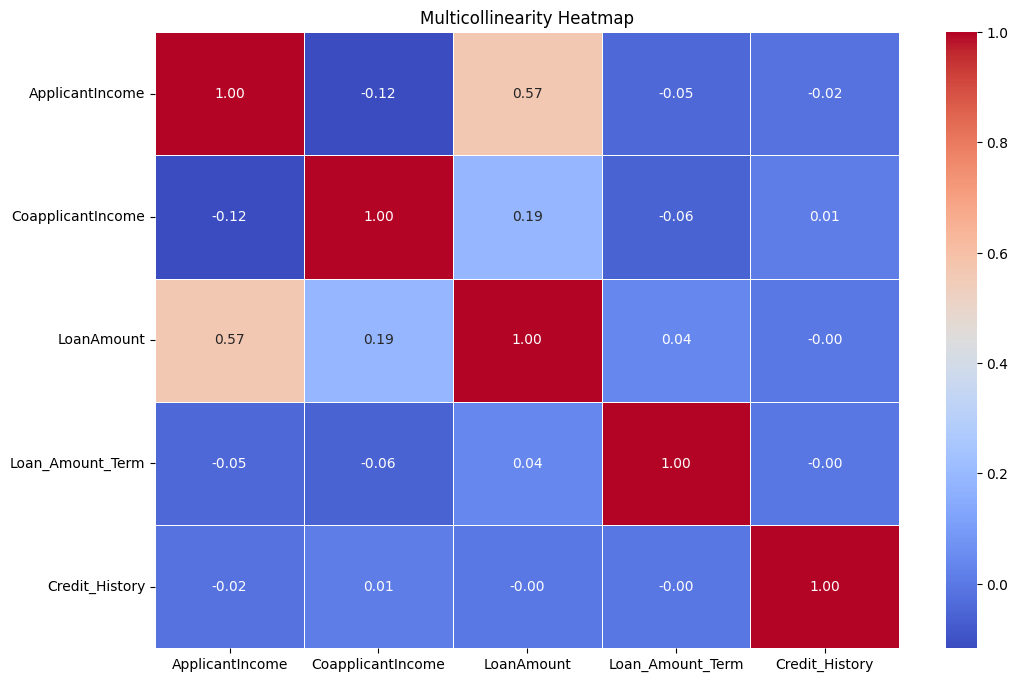

In [ ]:
correlation_matrix = loandata[['Dependents','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term', 'Gender','Married','Education','Credit_History','Property_Area']].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Multicollinearity Heatmap')
plt.show()
#No two variables have a strong relationship, which is good

One hot encode categorical variables

In [ ]:
#loandata.drop("Loan_ID", axis=1, inplace=True)
# One-hot encode the categorical columns
onehot = pd.get_dummies(loandata, drop_first=True)
onehot.head(10)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,128.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1
5,5417,4196.0,267.0,360.0,1.0,1,1,0,1,0,0,1,0,1,1
6,2333,1516.0,95.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
7,3036,2504.0,158.0,360.0,0.0,1,1,0,0,1,0,0,1,0,0
8,4006,1526.0,168.0,360.0,1.0,1,1,0,1,0,0,0,0,1,1
9,12841,10968.0,349.0,360.0,1.0,1,1,1,0,0,0,0,1,0,0


Split data into testing and training set

In [ ]:
# Separate features and target variable
Xvar = onehot.drop("Loan_Status_Y", axis=1)
yvar = onehot["Loan_Status_Y"]

# Split data into training and testing sets (80% training, 20% testing)
x_train, x_test, y_train, y_test = train_test_split(Xvar, yvar, test_size=0.2, random_state=42)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((491, 14), (123, 14), (491,), (123,))

Logistic Regression

In [ ]:
# Initialize the logistic regression model
logistic_reg = LogisticRegression(max_iter=1000)

# Train the model on the training data
logistic_reg.fit(x_train, y_train)

# Predict on the testing data
y_pred = logistic_reg.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate classification report
class_report = classification_report(y_test, y_pred)

accuracy, class_report

(0.7886178861788617,
 '              precision    recall  f1-score   support\n\n           0       0.95      0.42      0.58        43\n           1       0.76      0.99      0.86        80\n\n    accuracy                           0.79       123\n   macro avg       0.85      0.70      0.72       123\nweighted avg       0.83      0.79      0.76       123\n')

A way to better visualize the confusion matrix for accuracy, precision, recall, and F-1 score

0.7886178861788617
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



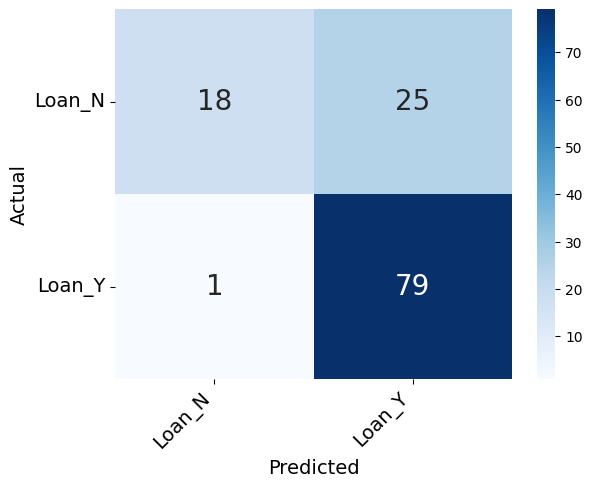

In [ ]:
# Printing accuracy of predictions
print(accuracy_score(y_test, y_pred))

# Visualize the confusion matrix
from sklearn.metrics import confusion_matrix
con_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix_df = pd.DataFrame(con_matrix, ('Loan_N', 'Loan_Y'), ('Loan_N', 'Loan_Y'))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d", cmap="Blues")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
plt.ylabel('Actual', fontsize = 14)
plt.xlabel('Predicted', fontsize = 14)

#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))